In [1]:
import torch
import torchvision
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [2]:
# Data import

dataset = pd.read_csv('./AOB_Sum.csv')
X = dataset.iloc[:, 1:41].values
Y = dataset.iloc[:, 41].values

In [3]:
dataset.head()

,studyid,preweightkg,prebmi,height,prebmicat,weightkg,q1bmi,q1bmicat,q1exer_2catrecode,ethnicity_2category,...,q1psi_1sd,q1dep,q1dep10,q1dep13,q1eh,q1ph,q1anx,GWGraw,bmifinal,Obesity
0,510368,58.95,21.0,167.545303,2,63.0,22.4,2,2,1,...,0,8,0,0,0,0,42,7.65,23.7,no
1,510369,73.00,26.0,167.561699,3,73.0,26.0,3,2,1,...,1,14,1,1,0,1,51,7.00,28.5,no
2,512265,52.00,22.5,152.023390,2,59.0,25.5,3,1,0,...,1,15,1,1,0,0,38,18.00,30.3,yes
3,515122,54.00,20.4,162.697843,2,54.0,20.4,2,1,1,...,0,5,0,0,0,0,25,4.95,22.3,no
4,515123,54.90,18.3,173.205081,1,56.7,18.9,2,2,1,...,0,0,0,0,0,0,21,12.15,22.4,no


In [4]:
print(format(dataset.shape))

(470, 42)


In [5]:
# Check for any missing data point

dataset.isnull().sum()
dataset.isna().sum()

studyid                         0
preweightkg                     0
prebmi                          0
height                          0
prebmicat                       0
weightkg                        0
q1bmi                           0
q1bmicat                        0
q1exer_2catrecode               0
ethnicity_2category             0
aboriginallumped                0
mometh                          0
dadaboriginallumped             0
pateth                          0
q2weightkg                      0
q2bmi                           0
q2bmicat                        0
q3ga                            0
childgender                     0
baby1totalgramsfinal            0
matagedelivery                  0
prebmi_recode3categories        0
q3bmi_recode3categories         0
wgbmi_cat                       0
PregnancyInducedHypertension    0
Proteinuria                     0
GestationalDiabetes             0
Anemia                          0
PoorWeightGain                  0
HX_DM         

In [6]:
# Convert obesity text (Y/N) into numberical values

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print(Y)

[1 1 2 1 1 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 2 1
 2 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1
 1 2 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1
 1 1 1 2 1 2 1 2 2 2 1 1 2 2 2 1 1 1 1 2 0 2 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 2 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 2 1 1 2 2 2
 2 2 1 2 1 1 1 2 1 1 1 1 2 1 0 1 2 2 1 2 1 1 1 2 1 1 2 2 1 2 1 1 1 2 1 1 1
 1 1 2 1 2 1 1 1 1 2 1 2 1 2 1 1 2 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1
 1 1 1 2 2 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 1 2 2 2 1 1 1
 1 1 1 2 1 1 2 1 1 2 1 1 1 2 2 2 1 1 2 2 2 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 2
 2 2 2 1 1 2 1 2 1 1 2 1 2 2 1 2 1 2 1 1 2 1 1 1 1 1 2 1 2 2 1 1 2 2 1 1 2
 1 1 1 1 1 2 2 1 1 2 1 2 1 1 1 1 2 2 1 1 1 2 2 1 2 2 1 1 2 1 2 1 1 2 1 1 1
 1 1 1 1 1 2 1 2 1 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 1 2 1 2 2 1 2 1 1 2 2 2
 2 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 2 2]


In [7]:
# Spit data into training (75%) and testing sets (25%)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [8]:
# Transform data for feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train.shape

(352, 40)

In [10]:
X_test.shape

(118, 40)

In [11]:
np.mean(X_train),np.std(X_train)

(-3.936245269125555e-17, 0.9617692030835674)

In [12]:
# Use principle components which retain 90% variance

from sklearn.decomposition import PCA
pca=PCA(0.9)

In [13]:
# Test PCA with the training data set

pca.fit(X_train)
PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.9)

In [14]:
# Check the number of principle components

pca.n_components_

19

In [15]:
# Apply PCA to training and testing sets

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# Test out classification models for training/testing performance
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logclassifier = LogisticRegression(random_state = 0)
logclassifier.fit(X_train_pca, Y_train)

LogisticRegression(random_state=0)

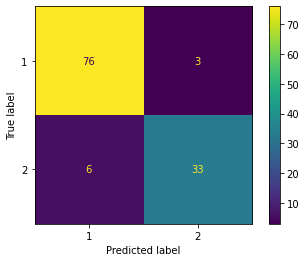

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logclassifier.fit(X_train_pca, Y_train), X_test_pca, Y_test)

In [18]:
accuracy_pca_log = (76+33)/(76+33+3+6)*100
print(accuracy_pca_log,"%")

92.37288135593221 %


In [19]:
# naive bayes

from sklearn.naive_bayes import GaussianNB
naiveclassifier = GaussianNB()
naiveclassifier.fit(X_train_pca, Y_train)

GaussianNB()

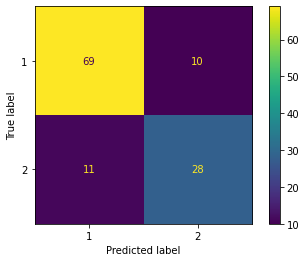

In [20]:
plot_confusion_matrix(naiveclassifier.fit(X_train_pca, Y_train), X_test_pca, Y_test)

In [21]:
accuracy_pca_log = (69+28)/(69+28+11+10)*100
print(accuracy_pca_log,"%")

82.20338983050848 %


In [22]:
# K Nearest neighbor

from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNclassifier.fit(X_train_pca, Y_train)

KNeighborsClassifier()

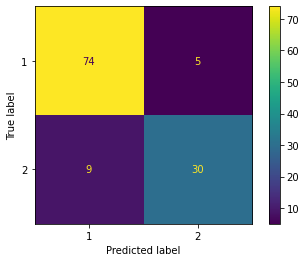

In [23]:
plot_confusion_matrix(KNclassifier.fit(X_train_pca, Y_train), X_test_pca, Y_test)

In [24]:
accuracy_pca_Kneighbor = (74+30)/(74+30+5+9)*100
print(accuracy_pca_Kneighbor,"%")

88.13559322033898 %


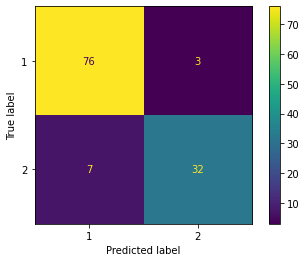

In [25]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier
forestclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forestclassifier.fit(X_train_pca, Y_train)

plot_confusion_matrix(forestclassifier.fit(X_train_pca, Y_train), X_test_pca, Y_test)

In [26]:
accuracy_pca_forest = (76+32)/(76+32+3+7)*100
print(accuracy_pca_forest,"%")

91.52542372881356 %
